**IMPORTS**

In [ ]:
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 25.9 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [1]:

import pandas as pd
import numpy as np
import sklearn as sk

## Some Utils

In [23]:
def load_data():
  if 'df' in globals():
    return
  global df
  try: 
    df = pd.read_csv("../data/crime.csv")
  except FileNotFoundError:
    from google.colab import drive
    drive.mount('/content/drive')
    df=pd.read_csv('/content/drive/MyDrive/MD/Laboratori/Practica 2/data/Crime.csv')



## Load Data

In [ ]:
load_data()

### Manually load data from colab

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# df=pd.read_csv('/content/drive/MyDrive/Mineria de dades (MD)/Laboratori/Practica 2/data/Crime.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Manually load data from localStorage

In [ ]:
# df = pd.read_csv('../data/crime.csv')

/var/folders/4g/4mg3yqjd19d7p07yd8bflylr0000gn/T/ipykernel_4403/1994704606.py:1: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/crime.csv')


## GENERAL DESCRIPTION AND PREPROCESSING

In [ ]:
df.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201223224,2303,190002520,01/16/2019 03:51:46 PM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,...,NaN,VEIRS MILL,NaN,RD,01/16/2019 03:51:00 PM,NaN,39.037367,-77.051662,4D,"(39.0374, -77.0517)"
1,201224613,2006,190004310,01/27/2019 06:05:56 PM,200,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,...,NaN,GIRARD,NaN,ST,01/27/2019 06:05:00 PM,NaN,39.146531,-77.184940,6D,"(39.1465, -77.1849)"
2,201267200,1103,190057412,11/28/2019 06:08:02 AM,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,...,NaN,GEORGIA,NaN,AVE,11/28/2019 06:08:00 AM,NaN,39.034255,-77.049163,4D,"(39.0343, -77.0492)"
3,201230900,1399,190011960,03/15/2019 10:53:22 AM,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,BLV,03/15/2019 10:50:00 AM,03/15/2019 10:55:00 AM,39.141812,-77.224489,6D,"(39.1418, -77.2245)"
4,201265312,1399,190055150,11/15/2019 03:31:20 PM,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,MIDCOUNTY,NaN,HWY,11/15/2019 03:20:00 PM,NaN,39.159339,-77.198516,6D,"(39.1593, -77.1985)"


## Check for missing values per features

In [ ]:
df.isna().sum()

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       68799
NIBRS Code                     0
Victims                        0
Crime Name1                  141
Crime Name2                  141
Crime Name3                  141
Police District Name           0
Block Address              20502
City                        1057
State                          0
Zip Code                    3187
Agency                         0
Place                          0
Sector                        59
Beat                          59
PRA                           41
Address Number             20428
Street Prefix             215741
Street Name                    0
Street Suffix             221447
Street Type                  314
Start_Date_Time                0
End_Date_Time             116652
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Incident ID,225690.0,NaN,NaN,NaN,201197538.462962,63283.25615,201087096.0,201143072.25,201197650.5,201251828.75,201307418.0
Offence Code,225690.0,611.0,2305.0,13105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CR Number,225690.0,NaN,NaN,NaN,153887254.584665,65671397.179018,10011074.0,170518488.25,180035308.0,190037943.75,202036672.0
Dispatch Date / Time,156891,143399,12/02/2019 04:39:39 PM,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NIBRS Code,225690,55,90Z,51802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Victims,225690.0,NaN,NaN,NaN,1.020887,0.185685,1.0,1.0,1.0,1.0,22.0
Crime Name1,225549,5,Crime Against Property,98217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime Name2,225549,56,All Other Offenses,52181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime Name3,225549,325,LARCENY - FROM AUTO,19682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Police District Name,225690,9,SILVER SPRING,48099,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# We drop columns Street Prefix and Street Suffix due to high number of na values and Incident ID because does not give information
df.drop(['Street Prefix', 'Street Suffix', 'Incident ID'], axis = 1, inplace = True)

Boxplots


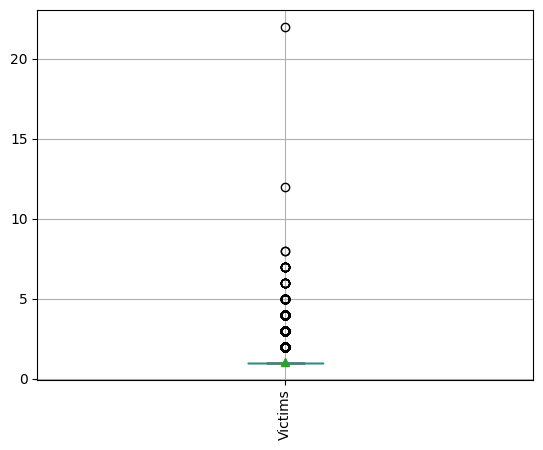

In [ ]:
df.boxplot(column='Victims',meanline=False,showmeans=True,return_type='dict', rot = 90)
print("Boxplots")

In [31]:
df.boxplot(column='Latitude',meanline=False,showmeans=True,return_type='dict')
print("Boxplots")

{'whiskers': [<matplotlib.lines.Line2D at 0x28c093750>,
 'caps': [<matplotlib.lines.Line2D at 0x28c0a0b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x28c093090>],
 'medians': [<matplotlib.lines.Line2D at 0x28c0a1fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28c0a0950>],
 'means': [<matplotlib.lines.Line2D at 0x28c0a2a50>]}

In [29]:
df.boxplot(column='Longitude',meanline=False,showmeans=True,return_type='dict')
print("Boxplots")

{'whiskers': [<matplotlib.lines.Line2D at 0x28c05d810>,
 'caps': [<matplotlib.lines.Line2D at 0x28c05ec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x28c05d1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x28c068190>],
 'fliers': [<matplotlib.lines.Line2D at 0x28b9b8a10>],
 'means': [<matplotlib.lines.Line2D at 0x28bcd7c10>]}

Histograms


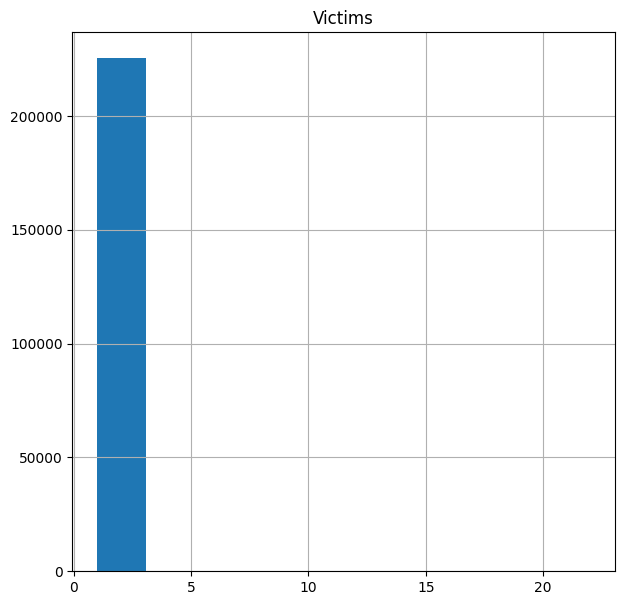

In [ ]:
df.hist(column='Victims',  bins=10, figsize=[7,7])
print("Histograms")

In [ ]:
df[df.Victims>df.Victims.mean()+2*df.Victims.std()]

,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,...,PRA,Address Number,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
3,1399,190011960,03/15/2019 10:53:22 AM,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,700 BLK QUINCE ORCHARD BLV,...,554.0,700.0,QUINCE ORCHARD,BLV,03/15/2019 10:50:00 AM,03/15/2019 10:55:00 AM,39.141812,-77.224489,6D,"(39.1418, -77.2245)"
50,1315,190048387,10/08/2019 09:08:34 PM,13A,2,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,WHEATON,11300 BLK ELKIN ST,...,354.0,11300.0,ELKIN,ST,10/08/2019 09:08:00 PM,10/08/2019 10:00:00 PM,39.040343,-77.050348,4D,"(39.0403, -77.0503)"
133,1399,180037163,07/26/2018 11:59:07 PM,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,ROCKVILLE,13700 BLK CANAL VISTA CT,...,455.0,13700.0,CANAL VISTA,CT,07/26/2018 11:59:00 PM,NaN,39.053998,-77.283228,1D,"(39.054, -77.2832)"
223,1399,190052143,10/29/2019 03:04:23 PM,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,WHEATON,3000 BLK HOLLOW CREST PL,...,401.0,3000.0,HOLLOW CREST,PL,10/29/2019 03:04:00 PM,NaN,39.161347,-77.061024,4D,"(39.1613, -77.061)"
274,1399,190046611,09/28/2019 11:05:12 PM,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,GERMANTOWN,19900 BLK APPLEDOWRE CIR,...,471.0,19900.0,APPLEDOWRE,CIR,09/28/2019 11:05:00 PM,NaN,39.184764,-77.235070,5D,"(39.1848, -77.2351)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225388,1399,190027503,06/09/2019 03:43:06 AM,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,BETHESDA,8600 BLK 16TH ST,...,517.0,8600.0,16TH,ST,06/09/2019 03:43:00 AM,NaN,38.999287,-77.039868,2D,"(38.9993, -77.0399)"
225393,1304,190033395,07/14/2019 12:56:27 AM,13A,2,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - NON-FAMILY-GUN,SILVER SPRING,13800 BLK OUTLET DR,...,380.0,13800.0,OUTLET,DR,07/14/2019 12:56:00 AM,07/14/2019 01:00:00 AM,39.082129,-76.947299,3D,"(39.0821, -76.9473)"
225398,1399,190028910,06/17/2019 12:59:20 PM,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,GERMANTOWN,19300 BLK CIRCLE GATE DR,...,447.0,19300.0,CIRCLE GATE,DR,06/17/2019 12:59:00 PM,NaN,39.172429,-77.266823,5D,"(39.1724, -77.2668)"
225496,9199,190031737,07/03/2019 03:10:22 PM,90Z,2,Other,All Other Offenses,POLICE INFORMATION,WHEATON,3700 BLK STONEY CASTLE ST,...,400.0,3700.0,STONEY CASTLE,ST,06/22/2019 02:00:00 PM,07/03/2019 02:00:00 PM,39.167337,-77.072638,4D,"(39.1673, -77.0726)"


In [ ]:
df.columns

Index(['Offence Code', 'CR Number', 'Dispatch Date / Time', 'NIBRS Code',
       'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Name', 'Street Type', 'Start_Date_Time', 'End_Date_Time',
       'Latitude', 'Longitude', 'Police District Number', 'Location'],
      dtype='object')

In [ ]:
# One hot encoding of variable Crime Name1
pd.get_dummies(df, columns=['Crime Name1'],drop_first=True).head()

,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name2,Crime Name3,Police District Name,Block Address,City,...,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location,Crime Name1_Crime Against Property,Crime Name1_Crime Against Society,Crime Name1_Not a Crime,Crime Name1_Other
0,2303,190002520,01/16/2019 03:51:46 PM,23C,1,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,11100 BLK VEIRS MILL RD,SILVER SPRING,...,01/16/2019 03:51:00 PM,NaN,39.037367,-77.051662,4D,"(39.0374, -77.0517)",1,0,0,0
1,2006,190004310,01/27/2019 06:05:56 PM,200,1,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,400 BLK GIRARD ST,GAITHERSBURG,...,01/27/2019 06:05:00 PM,NaN,39.146531,-77.184940,6D,"(39.1465, -77.1849)",1,0,0,0
2,1103,190057412,11/28/2019 06:08:02 AM,11A,1,Forcible Rape,RAPE - STRONG-ARM,WHEATON,10900 BLK GEORGIA AVE,SILVER SPRING,...,11/28/2019 06:08:00 AM,NaN,39.034255,-77.049163,4D,"(39.0343, -77.0492)",0,0,0,0
3,1399,190011960,03/15/2019 10:53:22 AM,13B,2,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,700 BLK QUINCE ORCHARD BLV,GAITHERSBURG,...,03/15/2019 10:50:00 AM,03/15/2019 10:55:00 AM,39.141812,-77.224489,6D,"(39.1418, -77.2245)",0,0,0,0
4,1399,190055150,11/15/2019 03:31:20 PM,13B,1,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,NaN,MONTGOMERY VILLAGE,...,11/15/2019 03:20:00 PM,NaN,39.159339,-77.198516,6D,"(39.1593, -77.1985)",0,0,0,0


In [ ]:
# We check that Police District Name and Number are describing the same
print(df.groupby(['Police District Name', 'Police District Number']).size())
df.drop('Police District Number', axis = 1, inplace = True)

Police District Name  Police District Number
BETHESDA              2D                        30414
CITY OF TAKOMA PARK   8D                         5542
GERMANTOWN            5D                        28664
MONTGOMERY VILLAGE    6D                        38262
OTHER                 OTHER                        46
ROCKVILLE             1D                        30989
SILVER SPRING         3D                        48099
TAKOMA PARK           TPPD                         13
WHEATON               4D                        43661
dtype: int64


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Incident ID,225690.0,NaN,NaN,NaN,201197538.462962,63283.25615,201087096.0,201143072.25,201197650.5,201251828.75,201307418.0
Offence Code,225690.0,611.0,2305.0,13105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CR Number,225690.0,NaN,NaN,NaN,153887254.584665,65671397.179018,10011074.0,170518488.25,180035308.0,190037943.75,202036672.0
Dispatch Date / Time,156891,143399,12/02/2019 04:39:39 PM,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NIBRS Code,225690,55,90Z,51802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Victims,225690.0,NaN,NaN,NaN,1.020887,0.185685,1.0,1.0,1.0,1.0,22.0
Crime Name1,225549,5,Crime Against Property,98217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime Name2,225549,56,All Other Offenses,52181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime Name3,225549,325,LARCENY - FROM AUTO,19682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Police District Name,225690,9,SILVER SPRING,48099,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**NORMALISATION**

In [ ]:
df['Crime Name2'].value_counts()

Crime Name2
All Other Offenses                             52181
Drug/Narcotic Violations                       20920
Theft From Motor Vehicle                       19682
Simple Assault                                 14881
Destruction/Damage/Vandalism of Property       13659
Driving Under the Influence                    12056
Shoplifting                                    11554
All other Larceny                              10199
Theft from Building                             8406
Burglary/Breaking and Entering                  6547
Liquor Law Violations                           6263
Identity Theft                                  4444
Disorderly Conduct                              4415
False Pretenses/Swindle/Confidence Game         4267
Motor Vehicle Theft                             4099
Theft of Motor Vehicle Parts or Accessories     3717
Trespass of Real Property                       3303
Credit Card/Automatic Teller Machine Fraud      3113
Aggravated Assault                

In [ ]:
drive.flush_and_unmount()